In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

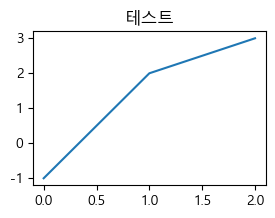

In [2]:
# ----------------------
# 그래프 전역 설정
# ----------------------
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
plt.rc('figure', figsize=(10,4))
pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass

## 데이터 수집 및 전처리
* 행정안전부<br>
https://www.mois.go.kr/<br>
정책자료 > 주민등록인구통계<br>
전체읍면동 현황<br><br>
* 바로가기<br>
https://jumin.mois.go.kr/index.jsp

#### 데이터프레임 생성

In [3]:
# ------------------------
# 데이터프레임 생성
#   - df_all
#   - 천단위 구분자 처리 : thousands
# ------------------------
address = "data/202503_202503_주민등록인구및세대현황_월간.csv"
df = pd.read_csv(address, encoding="cp949", thousands=",")
df  

,행정구역,2025년03월_총인구수,2025년03월_세대수,2025년03월_세대당 인구,2025년03월_남자 인구수,2025년03월_여자 인구수,2025년03월_남여 비율
0,서울특별시 (1100000000),9335734,4497896,2.08,4504618,4831116,0.93
1,서울특별시 종로구 (1111000000),138184,72387,1.91,66450,71734,0.93
2,서울특별시 종로구 청운효자동(1111051500),10986,4915,2.24,5007,5979,0.84
3,서울특별시 종로구 사직동(1111053000),8937,4562,1.96,3940,4997,0.79
4,서울특별시 종로구 삼청동(1111054000),2189,1094,2.00,1049,1140,0.92
...,...,...,...,...,...,...,...
3908,제주특별자치도 서귀포시 서홍동(5013058000),11088,4625,2.40,5473,5615,0.97
3909,제주특별자치도 서귀포시 대륜동(5013059000),15038,6935,2.17,7602,7436,1.02
3910,제주특별자치도 서귀포시 대천동(5013060000),13672,6556,2.09,6953,6719,1.03
3911,제주특별자치도 서귀포시 중문동(5013061000),12122,6005,2.02,6119,6003,1.02


In [4]:
df.head()

,행정구역,2025년03월_총인구수,2025년03월_세대수,2025년03월_세대당 인구,2025년03월_남자 인구수,2025년03월_여자 인구수,2025년03월_남여 비율
0,서울특별시 (1100000000),9335734,4497896,2.08,4504618,4831116,0.93
1,서울특별시 종로구 (1111000000),138184,72387,1.91,66450,71734,0.93
2,서울특별시 종로구 청운효자동(1111051500),10986,4915,2.24,5007,5979,0.84
3,서울특별시 종로구 사직동(1111053000),8937,4562,1.96,3940,4997,0.79
4,서울특별시 종로구 삼청동(1111054000),2189,1094,2.00,1049,1140,0.92


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3913 entries, 0 to 3912
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   행정구역             3913 non-null   object 
 1   2025년03월_총인구수    3913 non-null   int64  
 2   2025년03월_세대수     3913 non-null   int64  
 3   2025년03월_세대당 인구  3913 non-null   float64
 4   2025년03월_남자 인구수  3913 non-null   int64  
 5   2025년03월_여자 인구수  3913 non-null   int64  
 6   2025년03월_남여 비율   3913 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 214.1+ KB


#### 컬럼명 변경

In [6]:
# ------------------------
# ['행정구역','총인구수','세대수','세대당 인구','남자 인구수','여자 인구수','남여 비율']
# ------------------------
df.columns = ['행정구역','총인구수','세대수','세대당 인구','남자 인구수','여자 인구수','남여 비율']

In [7]:
display(df.columns)
df.head(1)



Index(['행정구역', '총인구수', '세대수', '세대당 인구', '남자 인구수', '여자 인구수', '남여 비율'], dtype='object')

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),9335734,4497896,2.08,4504618,4831116,0.93


#### 파생컬럼 추가
* 행정구역별
    * 행정구역 컬럼에서 행정구역명만 분리
* str 접근자
    * 시리즈나 컬럼에 문자열 메소드를 적용할 때 사용
        * 예) `컬럼.str.replace(' ', '')`    
    * 시리즈나 컬럼의 문자열 인덱스/슬라이스를 할 때 사용
        * 예) `컬럼.str[3:]`

In [8]:
# ------------------------
# 행정구역명 컬럼 추가
# ------------------------

df['행정구역명'] = df["행정구역"].str.split(" ").str[0]
df.sample(5)

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명
600,부산광역시 사하구 다대제1동(2638060100),35333,16572,2.13,17578,17755,0.99,부산광역시
3381,경상북도 문경시 점촌2동(4728058000),6437,3461,1.86,3082,3355,0.92,경상북도
222,서울특별시 마포구 공덕동(1144056500),36009,18442,1.95,16731,19278,0.87,서울특별시
3317,경상북도 영주시 휴천1동(4721059000),6165,2895,2.13,3046,3119,0.98,경상북도
2887,전라남도 순천시 주암면(4615035000),2843,1798,1.58,1450,1393,1.04,전라남도


## 행정구역별 인구구조 분석
#### 데이터 준비
* 행정구역 레벨의 데이터 조건
    * 행정구역코드가 '00000000'(8자리)로 끝남

In [9]:
# ------------------------
# 행정구역 단위 데이터만 선택
#   - df_region1
#   - 행정구역 코드가 00000000로 끝나는 데이터 선택
# ------------------------

# df_all['행정구역'].str.contains('00000000')
cond = df['행정구역'].str.contains('00000000')
df_region1 = df.loc[cond].copy()
df_region1


,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명
0,서울특별시 (1100000000),9335734,4497896,2.08,4504618,4831116,0.93,서울특별시
452,부산광역시 (2600000000),3259219,1573392,2.07,1585597,1673622,0.95,부산광역시
675,대구광역시 (2700000000),2360493,1107511,2.13,1157424,1203069,0.96,대구광역시
837,인천광역시 (2800000000),3031361,1383536,2.19,1514643,1516718,1.00,인천광역시
1011,광주광역시 (2900000000),1402478,658426,2.13,692193,710285,0.97,광주광역시
1113,대전광역시 (3000000000),1439482,692001,2.08,717532,721950,0.99,대전광역시
1201,울산광역시 (3100000000),1095014,496377,2.21,563688,531326,1.06,울산광역시
1262,세종특별자치시 (3600000000),391812,164491,2.38,194941,196871,0.99,세종특별자치시
1288,경기도 (4100000000),13699381,6078515,2.25,6883349,6816032,1.01,경기도
1948,강원특별자치도 (5100000000),1512969,766193,1.97,760801,752168,1.01,강원특별자치도


#### 행정구역별 총 인구수 시각화
* 인구수가 많은 행정구역부터 내림차순 정렬
* 정렬된 데이터로 시각화

In [10]:
# -----------------------------------------
# 총 인구수 많은 순으로 정렬
# -----------------------------------------
df_region1.sort_values(by='총인구수', ascending=False, inplace=True)



<Axes: xlabel='행정구역명'>

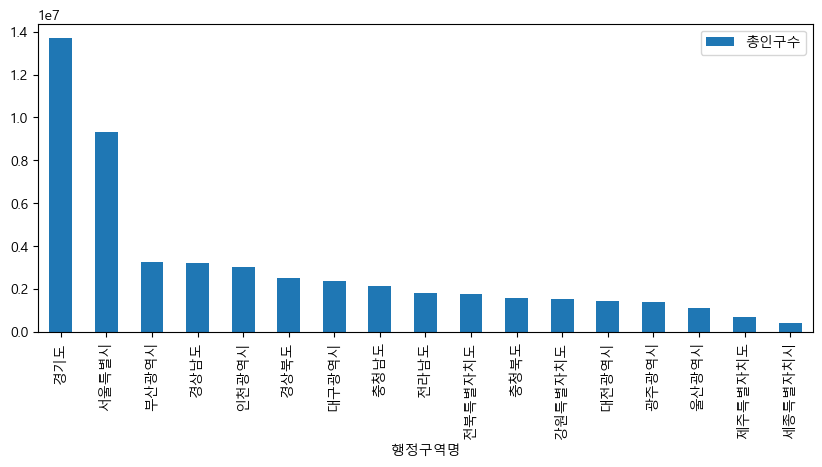

In [11]:
#pandas로 시각화
df_region1.plot(kind='bar', x='행정구역명', y = '총인구수')

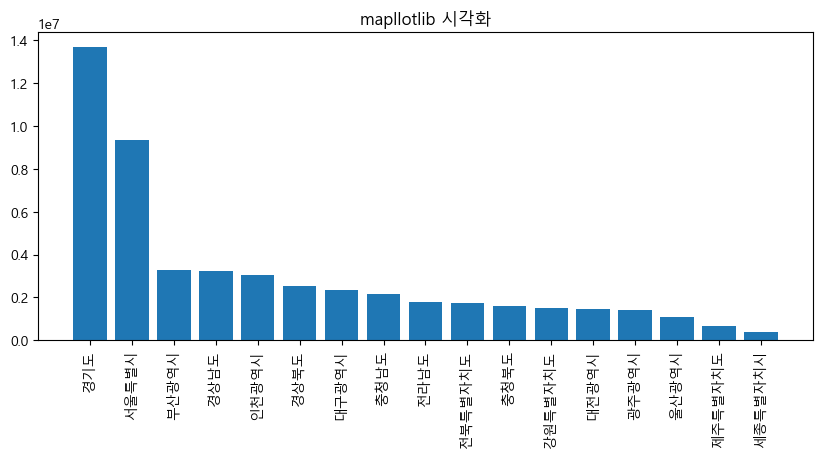

In [12]:
#maatplotliv로 시각화

plt.bar(df_region1['행정구역명'], df_region1['총인구수'])
plt.title('mapllotlib 시각화')
plt.xticks(rotation=90);

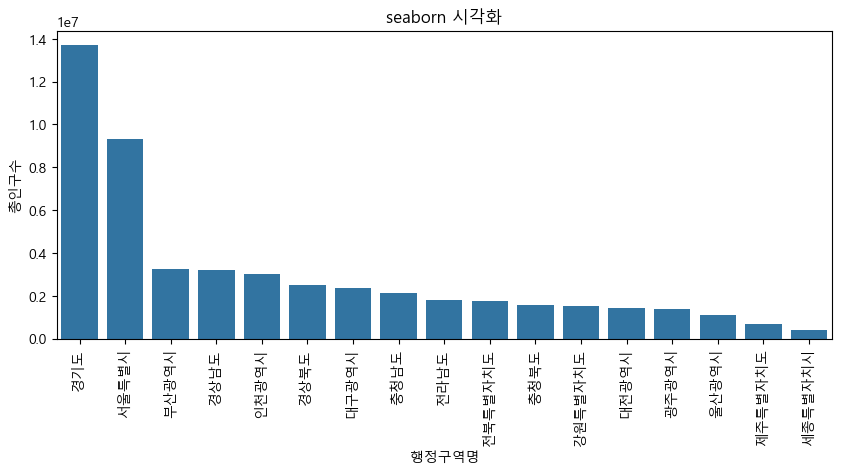

In [13]:
# ------------------------
# seaborn으로 시각화
# ------------------------


sns.barplot(data=df_region1, x='행정구역명', y='총인구수')
plt.title('seaborn 시각화')
plt.xticks(rotation=90);


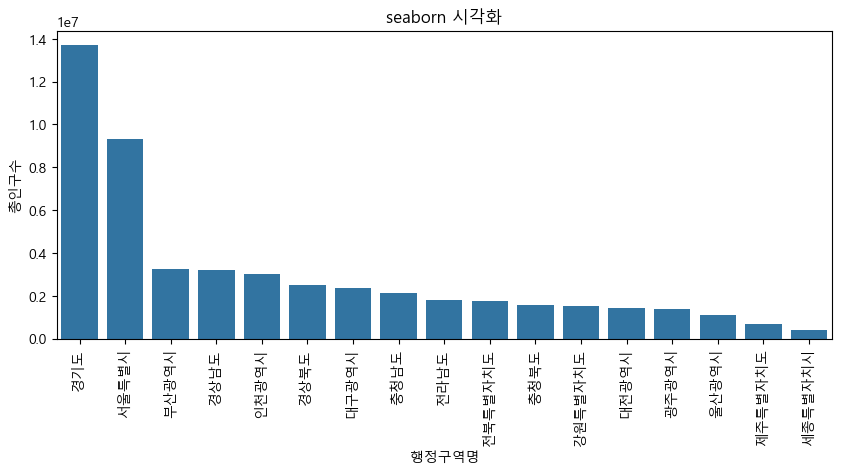

In [14]:
sns.barplot(data=df_region1, x='행정구역명', y='총인구수')
plt.title('seaborn 시각화')
plt.xticks(rotation=90);

## 시군구별 인구수 시각화

#### 데이터 준비

In [15]:
df_region1

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명
1288,경기도 (4100000000),13699381,6078515,2.25,6883349,6816032,1.01,경기도
0,서울특별시 (1100000000),9335734,4497896,2.08,4504618,4831116,0.93,서울특별시
452,부산광역시 (2600000000),3259219,1573392,2.07,1585597,1673622,0.95,부산광역시
3530,경상남도 (4800000000),3219574,1541943,2.09,1623318,1596256,1.02,경상남도
837,인천광역시 (2800000000),3031361,1383536,2.19,1514643,1516718,1.00,인천광역시
3170,경상북도 (4700000000),2523173,1294937,1.95,1276834,1246339,1.02,경상북도
675,대구광역시 (2700000000),2360493,1107511,2.13,1157424,1203069,0.96,대구광역시
2336,충청남도 (4400000000),2135628,1056928,2.02,1095977,1039651,1.05,충청남도
2823,전라남도 (4600000000),1785193,913770,1.95,901154,884039,1.02,전라남도
2564,전북특별자치도 (5200000000),1733574,866245,2.00,863734,869840,0.99,전북특별자치도


In [16]:
# ----------------------------------
# 분석할 행정구역 입력받기
#   - 변수명 : region_select
# ----------------------------------

# 행정구역명 입력받기
region_select = input('행정구역명 : ')

# 행정구역명 컬럼에서 입력한 텍스트를 검색해서 정확한 행정구역명을 만들어줍니다.
cond = df['행정구역명'].str.contains(region_select)
region_select = df.loc[cond, '행정구역명'].drop_duplicates().iloc[0]
print(f"분석할 행정구역명 : {region_select}")


분석할 행정구역명 : 부산광역시


In [17]:
region_select

'부산광역시'

In [18]:
cond = df['행정구역명'].str.contains(region_select)
region_select = df.loc[cond, '행정구역명'].drop_duplicates().iloc[0]
print(f"분석할 행정구역명 : {region_select}")

분석할 행정구역명 : 부산광역시


In [19]:
# ----------------------
# 입력받은 행정구역의 시군구 데이터 선택
#   - 변수명 : df_region2
#   - 선택조건1. 행정구역명
#   - 선택조건2. 시군구 행정구역코드는 '000000'(6자리) 로 끝남
#   - 선택조건3. 시군구 행정구역코드는 '000000'(8자리) 로 끝나지 않음
# ----------------------
cond1 = df['행정구역명'] == region_select
cond2 = df['행정구역'].str[-7:-1] == '000000'
cond3 = df['행정구역'].str[-9:-1] != '00000000'

df_region2 = df[cond1 & cond2 & cond3].copy()
df_region2



,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명
453,부산광역시 중구 (2611000000),37295,23526,1.59,18087,19208,0.94,부산광역시
463,부산광역시 서구 (2614000000),102891,53679,1.92,49334,53557,0.92,부산광역시
477,부산광역시 동구 (2617000000),85559,47000,1.82,41529,44030,0.94,부산광역시
490,부산광역시 영도구 (2620000000),103032,53547,1.92,50529,52503,0.96,부산광역시
502,부산광역시 부산진구 (2623000000),362533,186462,1.94,173556,188977,0.92,부산광역시
523,부산광역시 동래구 (2626000000),274784,122741,2.24,132398,142386,0.93,부산광역시
537,부산광역시 남구 (2629000000),253613,119803,2.12,123330,130283,0.95,부산광역시
555,부산광역시 북구 (2632000000),266015,122255,2.18,130466,135549,0.96,부산광역시
569,부산광역시 해운대구 (2635000000),375227,169847,2.21,179704,195523,0.92,부산광역시
588,부산광역시 사하구 (2638000000),291246,140774,2.07,144450,146796,0.98,부산광역시


In [20]:
# ----------------------
# 시군구명 칼럼 생성
# ----------------------
df_region2['시군구명'] = df_region2['행정구역'].str.split(" ").str[1]
df_region2

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명,시군구명
453,부산광역시 중구 (2611000000),37295,23526,1.59,18087,19208,0.94,부산광역시,중구
463,부산광역시 서구 (2614000000),102891,53679,1.92,49334,53557,0.92,부산광역시,서구
477,부산광역시 동구 (2617000000),85559,47000,1.82,41529,44030,0.94,부산광역시,동구
490,부산광역시 영도구 (2620000000),103032,53547,1.92,50529,52503,0.96,부산광역시,영도구
502,부산광역시 부산진구 (2623000000),362533,186462,1.94,173556,188977,0.92,부산광역시,부산진구
523,부산광역시 동래구 (2626000000),274784,122741,2.24,132398,142386,0.93,부산광역시,동래구
537,부산광역시 남구 (2629000000),253613,119803,2.12,123330,130283,0.95,부산광역시,남구
555,부산광역시 북구 (2632000000),266015,122255,2.18,130466,135549,0.96,부산광역시,북구
569,부산광역시 해운대구 (2635000000),375227,169847,2.21,179704,195523,0.92,부산광역시,해운대구
588,부산광역시 사하구 (2638000000),291246,140774,2.07,144450,146796,0.98,부산광역시,사하구


In [21]:
# -------------------
# 총인구수 내림차순 정렬
# --------------------
df_region2.sort_values(by='총인구수', ascending=False, inplace=True)
df_region2


,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명,시군구명
569,부산광역시 해운대구 (2635000000),375227,169847,2.21,179704,195523,0.92,부산광역시,해운대구
502,부산광역시 부산진구 (2623000000),362533,186462,1.94,173556,188977,0.92,부산광역시,부산진구
588,부산광역시 사하구 (2638000000),291246,140774,2.07,144450,146796,0.98,부산광역시,사하구
523,부산광역시 동래구 (2626000000),274784,122741,2.24,132398,142386,0.93,부산광역시,동래구
555,부산광역시 북구 (2632000000),266015,122255,2.18,130466,135549,0.96,부산광역시,북구
537,부산광역시 남구 (2629000000),253613,119803,2.12,123330,130283,0.95,부산광역시,남구
632,부산광역시 연제구 (2647000000),211527,99396,2.13,100946,110581,0.91,부산광역시,연제구
605,부산광역시 금정구 (2641000000),209085,104987,1.99,101728,107357,0.95,부산광역시,금정구
656,부산광역시 사상구 (2653000000),197625,99546,1.99,98968,98657,1.00,부산광역시,사상구
669,부산광역시 기장군 (2671000000),174953,79221,2.21,86694,88259,0.98,부산광역시,기장군


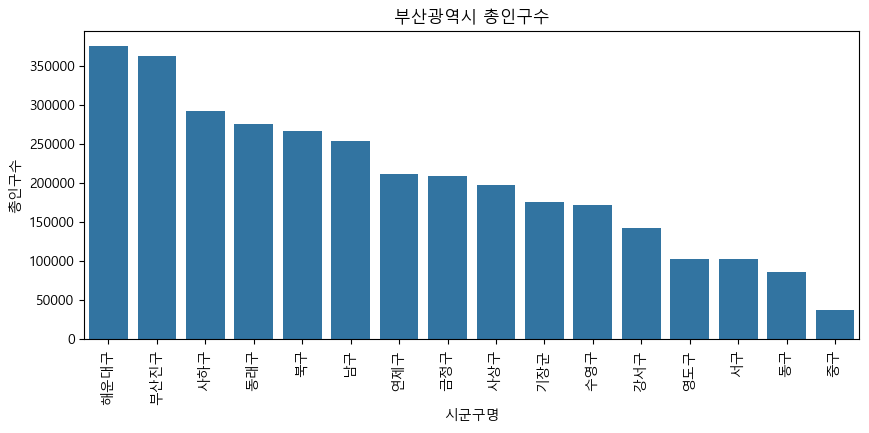

In [22]:
# -------------------
# seaborn 시각화를 위한 melt
#   df_region2_melt
# --------------------
sns.barplot(data=df_region2, x='시군구명', y='총인구수')
plt.title(f"{df_region2.iloc[0,7]} 총인구수")
plt.xticks(rotation=90)
pass

#### 시각화

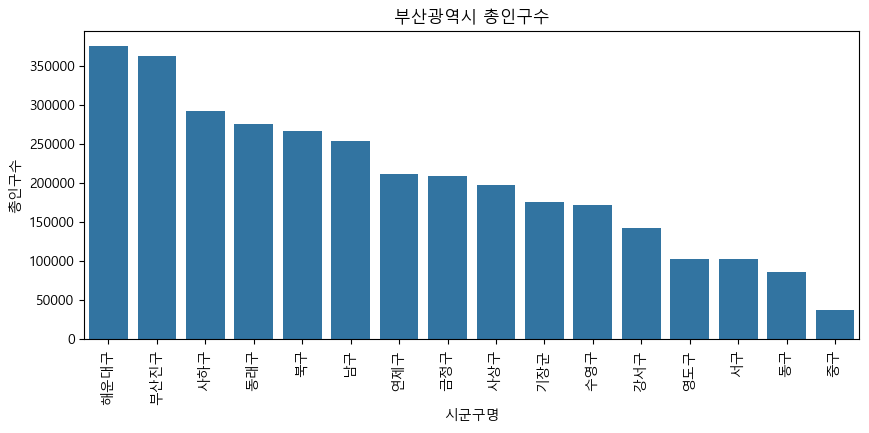

In [23]:
# -------------------
# 총인구수
# --------------------
sns.barplot(data=df_region2, x='시군구명', y='총인구수')
plt.title(f"{region_select} 총인구수")
plt.xticks(rotation=90)
pass

## 읍면동 인구수 시각화

#### 데이터 준비

In [29]:
# --------------------------------------------------------
# 행정구역의 읍면동 데이터 선택
#   - 변수명 : df_region3
# --------------------------------------------------------
cond1 = df['행정구역'].str[-9 : -1] != '00000000'
cond2 = df['행정구역'].str[-7 : -1] != '000000'
cond3 = df['행정구역명'] == region_select
cond4 = df['행정구역'].str[-6:-1] != '00000'

df_region3 = df[cond1 & cond2 & cond3 & cond4].copy()
df_region3


,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명
454,부산광역시 중구 중앙동(2611051000),3106,2494,1.25,1432,1674,0.86,부산광역시
455,부산광역시 중구 동광동(2611052000),2323,1548,1.50,1180,1143,1.03,부산광역시
456,부산광역시 중구 대청동(2611053000),5617,3412,1.65,2671,2946,0.91,부산광역시
457,부산광역시 중구 보수동(2611054500),9976,6097,1.64,4745,5231,0.91,부산광역시
458,부산광역시 중구 부평동(2611056000),4060,2596,1.56,1918,2142,0.90,부산광역시
...,...,...,...,...,...,...,...,...
670,부산광역시 기장군 기장읍(2671025000),51048,25891,1.97,24935,26113,0.95,부산광역시
671,부산광역시 기장군 장안읍(2671025300),8546,4910,1.74,4626,3920,1.18,부산광역시
672,부산광역시 기장군 정관읍(2671025600),77967,31520,2.47,38597,39370,0.98,부산광역시
673,부산광역시 기장군 일광읍(2671025900),30059,13093,2.30,14851,15208,0.98,부산광역시


In [31]:
# --------------------------------------------------------
# '시군구' 칼럼 추가
# '읍면동' 컬럼 추가
# '시군구 읍면동' 칼럼 추가
# --------------------------------------------------------
df_region3['시군구'] = df_region3['행정구역'].str.split(' ').str[1]
df_region3['읍면동'] = df_region3['행정구역'].str.split(' ').str[2].str.split('(').str[0]
df_region3['시군구 읍면동'] = df_region3['시군구'] + ' ' + df_region3['읍면동'] 


In [34]:
# --------------------------------------------------------
# 읍면동별 총인구수 내림차순 정렬
# --------------------------------------------------------

df_region3.sort_values(by="총인구수", ascending=False, inplace=True)
df_region3

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명,시군구,읍면동,시군구 읍면동
672,부산광역시 기장군 정관읍(2671025600),77967,31520,2.47,38597,39370,0.98,부산광역시,기장군,정관읍,기장군 정관읍
626,부산광역시 강서구 명지1동(2644053500),54374,21503,2.53,27271,27103,1.01,부산광역시,강서구,명지1동,강서구 명지1동
670,부산광역시 기장군 기장읍(2671025000),51048,25891,1.97,24935,26113,0.95,부산광역시,기장군,기장읍,기장군 기장읍
543,부산광역시 남구 용호제1동(2629057000),42334,17225,2.46,20227,22107,0.91,부산광역시,남구,용호제1동,남구 용호제1동
560,부산광역시 북구 화명제1동(2632054100),38987,14251,2.74,19006,19981,0.95,부산광역시,북구,화명제1동,북구 화명제1동
...,...,...,...,...,...,...,...,...,...,...,...
628,부산광역시 강서구 가락동(2644055000),2060,1245,1.65,1118,942,1.19,부산광역시,강서구,가락동,강서구 가락동
616,부산광역시 금정구 선두구동(2641063500),1992,1136,1.75,1054,938,1.12,부산광역시,금정구,선두구동,금정구 선두구동
621,부산광역시 금정구 금성동(2641070000),903,452,2.00,443,460,0.96,부산광역시,금정구,금성동,금정구 금성동
459,부산광역시 중구 광복동(2611057000),864,532,1.62,428,436,0.98,부산광역시,중구,광복동,중구 광복동


### 시각화

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명,시군구,읍면동,시군구 읍면동
672,부산광역시 기장군 정관읍(2671025600),77967,31520,2.47,38597,39370,0.98,부산광역시,기장군,정관읍,기장군 정관읍
626,부산광역시 강서구 명지1동(2644053500),54374,21503,2.53,27271,27103,1.01,부산광역시,강서구,명지1동,강서구 명지1동
670,부산광역시 기장군 기장읍(2671025000),51048,25891,1.97,24935,26113,0.95,부산광역시,기장군,기장읍,기장군 기장읍
543,부산광역시 남구 용호제1동(2629057000),42334,17225,2.46,20227,22107,0.91,부산광역시,남구,용호제1동,남구 용호제1동
560,부산광역시 북구 화명제1동(2632054100),38987,14251,2.74,19006,19981,0.95,부산광역시,북구,화명제1동,북구 화명제1동
586,부산광역시 해운대구 재송제1동(2635065000),36290,14592,2.49,17840,18450,0.97,부산광역시,해운대구,재송제1동,해운대구 재송제1동
539,부산광역시 남구 대연제3동(2629053000),36249,18421,1.97,17703,18546,0.95,부산광역시,남구,대연제3동,남구 대연제3동
529,부산광역시 동래구 온천제3동(2626057000),35729,17226,2.07,17364,18365,0.95,부산광역시,동래구,온천제3동,동래구 온천제3동
580,부산광역시 해운대구 반여제1동(2635057000),35381,13990,2.53,17353,18028,0.96,부산광역시,해운대구,반여제1동,해운대구 반여제1동
600,부산광역시 사하구 다대제1동(2638060100),35333,16572,2.13,17578,17755,0.99,부산광역시,사하구,다대제1동,사하구 다대제1동


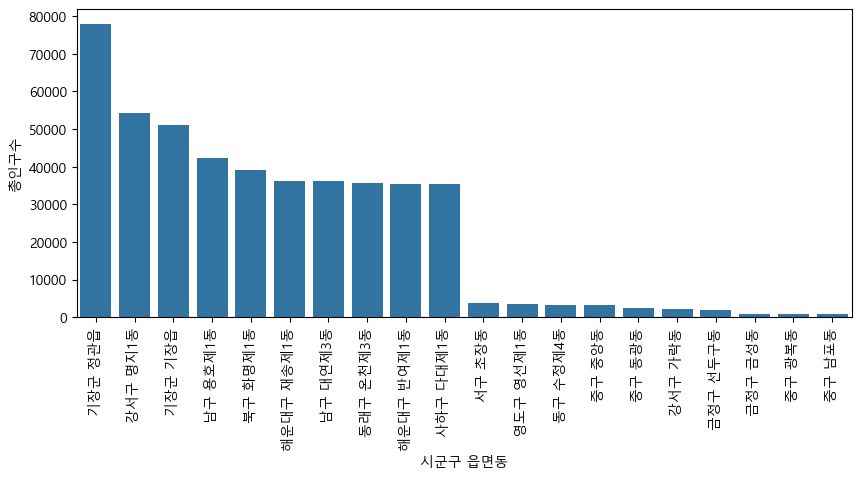

In [36]:
# --------------------------------------------------------
# 총 인구수 많은 10개 동과 적은 10개 동을 concat하여 시각화
# ---------------------------------------------------------
df_region3_subset = pd.concat([df_region3[:10], df_region3[-10:]])
display(df_region3_subset)
sns.barplot(data=df_region3_subset, x='시군구 읍면동', y='총인구수')
plt.xticks(rotation=90)
pass